In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Generator

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.reductions import EqualizedOdds
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import DemographicParity, EqualizedOdds
from fairlearn.reductions import ExponentiatedGradient

import warnings
from tqdm import tqdm
import time

from functions import *

base_path = './res_adult/'
n_size = [100,1000,10000]

## Pre-processing method

In [2]:
data = pd.read_csv("adult.csv")
data.income = data.income.replace({'<=50K':0, '>50K':1})
data.gender = data.gender.replace({'Male':0, 'Female':1})

data_types = data.dtypes
categorical_features = data_types[data_types == "object"].index.tolist()

for col_name in categorical_features:
    data[col_name] = data[col_name].astype("category")

Y, A = data.loc[:, "income"], data.loc[:,"gender"]
X = pd.get_dummies(data.drop(columns=["income"]))

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, Y, A, test_size=0.3, random_state=42)

In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature="gender",
                              B = 100, n_size = n_size, clf = "rf", base_path = base_path)

In [9]:
clf = "rf"
df_pre_100_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_1000_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_10000_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_rf, df_pre_1000_rf, df_pre_10000_rf)

Confidence intervals for size 1
AUC: [0.78,0.85]
DP: [0.10,0.41]
EO: [0.15,0.68]

Confidence intervals for size 2
AUC: [0.86,0.88]
DP: [0.18,0.26]
EO: [0.23,0.51]

Confidence intervals for size 3
AUC: [0.89,0.90]
DP: [0.18,0.21]
EO: [0.10,0.20]


#### Logistic Regression

In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature="gender",
                              B = 100, n_size = n_size, clf = "lr", base_path = base_path)

In [12]:
clf = "lr"
df_pre_100_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_1000_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_10000_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_lr, df_pre_1000_lr, df_pre_10000_lr)

Confidence intervals for size 1
AUC: [0.52,0.75]
DP: [0.00,0.21]
EO: [0.02,0.29]

Confidence intervals for size 2
AUC: [0.54,0.76]
DP: [0.00,0.04]
EO: [0.04,0.16]

Confidence intervals for size 3
AUC: [0.55,0.74]
DP: [0.02,0.04]
EO: [0.04,0.15]


## In-processing method

In [2]:
data = pd.read_csv("adult.csv")
data.income = data.income.replace({'<=50K':0, '>50K':1})
data.gender = data.gender.replace({'Male':0, 'Female':1})

data_types = data.dtypes
categorical_features = data_types[data_types == "object"].index.tolist()

for col_name in categorical_features:
    data[col_name] = data[col_name].astype("category")

Y, A = data.loc[:, "income"], data.loc[:, "gender"]
X = pd.get_dummies(data.drop(columns=["income"]))

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, Y, A, test_size=0.3)

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size, clf = 'rf', base_path = base_path)

In [2]:
clf = "rf"
df_in_100_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_1000_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_10000_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_rf, df_in_1000_dp_rf, df_in_10000_dp_rf)

Confidence intervals for size 1
AUC: [0.45,0.68]
DP: [0.00,0.13]
EO: [0.04,0.30]

Confidence intervals for size 2
AUC: [0.69,0.74]
DP: [0.00,0.05]
EO: [0.08,0.17]

Confidence intervals for size 3
AUC: [0.74,0.75]
DP: [0.00,0.02]
EO: [0.10,0.13]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size, clf = 'rf', base_path = base_path)

In [3]:
clf = "rf"
df_in_100_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_1000_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_10000_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_rf, df_in_1000_eo_rf, df_in_10000_eo_rf)

Confidence intervals for size 1
AUC: [0.58,0.73]
DP: [0.04,0.28]
EO: [0.02,0.38]

Confidence intervals for size 2
AUC: [0.72,0.75]
DP: [0.19,0.26]
EO: [0.22,0.43]

Confidence intervals for size 3
AUC: [0.75,0.77]
DP: [0.16,0.19]
EO: [0.07,0.15]


## Logistic regression

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size, clf = 'lr', base_path = base_path)

In [6]:
clf = "lr"
df_in_100_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_1000_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_10000_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_lr, df_in_1000_dp_lr, df_in_10000_dp_lr)

Confidence intervals for size 1
AUC: [0.48,0.71]
DP: [0.00,0.18]
EO: [0.01,0.25]

Confidence intervals for size 2
AUC: [0.47,0.74]
DP: [0.00,0.05]
EO: [0.00,0.15]

Confidence intervals for size 3
AUC: [0.48,0.61]
DP: [0.00,0.03]
EO: [0.02,0.09]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size, clf = 'lr', base_path = base_path)

In [5]:
clf = "lr"
df_in_100_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_1000_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_10000_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_lr, df_in_1000_eo_lr, df_in_10000_eo_lr)

Confidence intervals for size 1
AUC: [0.48,0.73]
DP: [0.00,0.22]
EO: [0.02,0.21]

Confidence intervals for size 2
AUC: [0.56,0.77]
DP: [0.01,0.08]
EO: [0.00,0.07]

Confidence intervals for size 3
AUC: [0.58,0.79]
DP: [0.02,0.07]
EO: [0.01,0.05]


## Post-processing method

In [3]:
data = pd.read_csv("adult.csv")
data = data.replace({'<=50K':0, '>50K':1})

data_types = data.dtypes
categorical_features = data_types[data_types == "object"].index.tolist()

for col_name in categorical_features:
    data[col_name] = data[col_name].astype("category")

Y, A = data.loc[:, "income"], data.loc[:, "gender"]
X = pd.get_dummies(data.drop(columns=["income", "gender"]))

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, Y, A, test_size=0.3, random_state=42)

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'rf', base_path = base_path)

In [20]:
clf = 'rf'
df_post_100_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_1000_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_10000_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp_rf, df_post_1000_dp_rf, df_post_10000_dp_rf)

Confidence intervals for size 1
AUC: [0.55,0.81]
DP: [0.01,0.62]
EO: [0.06,0.64]

Confidence intervals for size 2
AUC: [0.61,0.75]
DP: [0.10,0.38]
EO: [0.24,0.48]

Confidence intervals for size 3
AUC: [0.68,0.79]
DP: [0.02,0.28]
EO: [0.13,0.38]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test, fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'rf', base_path=base_path)

In [22]:
clf = 'rf'
df_post_100_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_post_1000_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_10000_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo_rf, df_post_1000_eo_rf, df_post_10000_eo_rf)

Confidence intervals for size 1
AUC: [0.60,0.73]
DP: [0.07,0.32]
EO: [0.05,0.47]

Confidence intervals for size 2
AUC: [0.73,0.77]
DP: [0.12,0.24]
EO: [0.05,0.27]

Confidence intervals for size 3
AUC: [0.73,0.79]
DP: [0.16,0.21]
EO: [0.06,0.15]


#### Logistic Regression

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'lr', base_path = base_path)

In [4]:
clf = 'lr'
df_post_100_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_1000_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_10000_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp_lr, df_post_1000_dp_lr, df_post_10000_dp_lr)

Confidence intervals for size 1
AUC: [0.52,0.70]
DP: [0.01,0.25]
EO: [0.02,0.27]

Confidence intervals for size 2
AUC: [0.54,0.75]
DP: [0.00,0.07]
EO: [0.04,0.17]

Confidence intervals for size 3
AUC: [0.54,0.72]
DP: [0.00,0.02]
EO: [0.05,0.17]


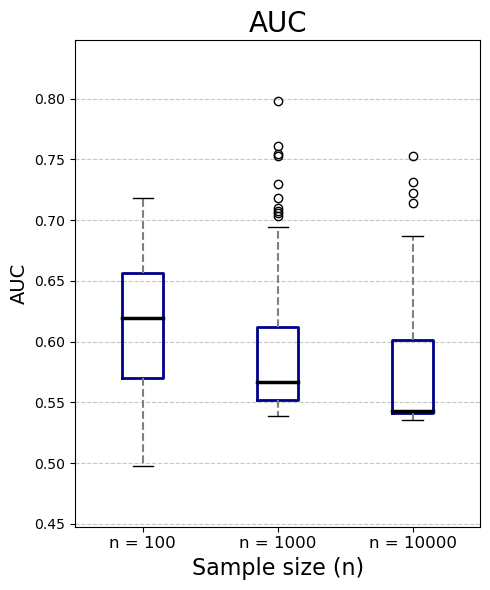

In [5]:
metrics_mitigated_lr_auc = [df_post_100_dp_lr.auc, df_post_1000_dp_lr.auc, df_post_10000_dp_lr.auc]
generate_boxplots(metrics_mitigated_lr_auc,
                  n_size = n_size,
                  metric = 'AUC',
                  method = 'threshold optimizer',
                  file_path='./fig_final/adult_post_boxplot_auc_lr.png',
                  dataset = 'Adult',
                  clf = 'lr')

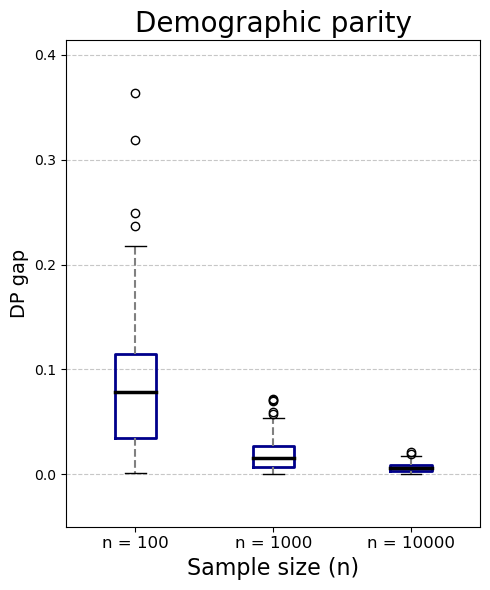

In [7]:
metrics_mitigated_lr_dp = [df_post_100_dp_lr.dp, df_post_1000_dp_lr.dp, df_post_10000_dp_lr.dp]
generate_boxplots(metrics_mitigated_lr_dp,
                  n_size = n_size,
                  metric = 'Demographic parity',
                  method = 'threshold optimizer',
                  file_path='./fig_final/adult_post_boxplot_dp_lr.png',
                  dataset = 'Adult',
                  clf = 'lr')

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test, fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'lr', base_path=base_path)

In [8]:
clf = 'lr'
df_post_100_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_post_1000_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_10000_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo_lr, df_post_1000_eo_lr, df_post_10000_eo_lr)

Confidence intervals for size 1
AUC: [0.43,0.71]
DP: [0.01,0.23]
EO: [0.02,0.22]

Confidence intervals for size 2
AUC: [0.53,0.75]
DP: [0.00,0.10]
EO: [0.01,0.19]

Confidence intervals for size 3
AUC: [0.53,0.77]
DP: [0.03,0.09]
EO: [0.00,0.05]


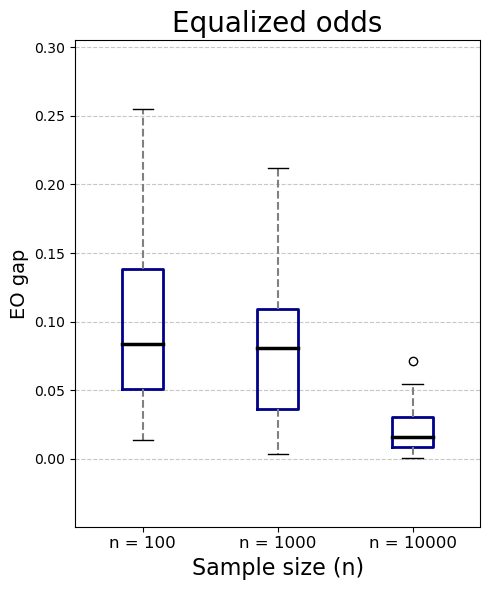

In [9]:
metrics_mitigated_lr_eo = [df_post_100_eo_lr.eo, df_post_1000_eo_lr.eo, df_post_10000_eo_lr.eo]
generate_boxplots(metrics_mitigated_lr_eo,
                  n_size = n_size,
                  metric = 'Equalized odds',
                  method = 'threshold optimizer',
                  file_path='./fig_final/adult_post_boxplot_eo_lr.png',
                  dataset = 'Adult',
                  clf = 'lr')

#### Compare to logistic regression without fairness-promoting algorithm

In [ ]:
clf = 'lr'
n_train = len(X_train)
ind_train = np.arange(n_train)
    
for n in tqdm(n_size):
        auc_boot_unmitigated = []; eo_boot_unmitigated = []; dp_boot_unmitigated = []
        df_unmitigated = pd.DataFrame()

        sample_ind = np.random.choice(ind_train, size=n, replace=False)
        X_train_sample = X_train.iloc[sample_ind,:]
        y_train_sample = y_train.iloc[sample_ind]
        A_train_sample = A_train.iloc[sample_ind]

        n_train_sample = len(X_train_sample)
        ind_train_sample = np.arange(n_train_sample)

        for b in tqdm(range(100)):
                boot_ind = np.random.choice(ind_train_sample, size = n, replace=True)
                X_train_boot = X_train_sample.iloc[boot_ind,:]
                y_train_boot = y_train_sample.iloc[boot_ind]
                A_train_boot = A_train_sample.iloc[boot_ind]

                classifier = LogisticRegression(random_state=42, max_iter = 1000)
                classifier.fit(X_train_boot, y_train_boot)

                pred = classifier.predict(X_test)
                pred_proba = classifier.predict_proba(X_test)[:,1]

                auc_unmitigated = roc_auc_score(y_test, pred_proba)
                eo_unmitigated = equalized_odds_difference(y_test, pred, sensitive_features=A_test)
                dp_unmitigated = demographic_parity_difference(y_test, pred, sensitive_features=A_test)

                auc_boot_unmitigated.append(auc_unmitigated)
                eo_boot_unmitigated.append(eo_unmitigated )
                dp_boot_unmitigated.append(dp_unmitigated)

        df_unmitigated['auc'] = auc_boot_unmitigated
        df_unmitigated['eo'] = eo_boot_unmitigated
        df_unmitigated['dp'] = dp_boot_unmitigated

        path = base_path+'post_metrics_nsize_{}_lr_without_fairness'.format(n)
        df_unmitigated.to_csv(path, index = False)

In [16]:
df_100_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_lr_without_fairness'.format(n_size[0]))
df_1000_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_lr_without_fairness'.format(n_size[1]))
df_10000_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_lr_without_fairness'.format(n_size[2]))

print_confidence_intervals(df_100_lr, df_1000_lr, df_10000_lr)

Confidence intervals for size 1
AUC: [0.48,0.78]
DP: [0.01,0.17]
EO: [0.02,0.11]

Confidence intervals for size 2
AUC: [0.57,0.70]
DP: [0.04,0.10]
EO: [0.02,0.07]

Confidence intervals for size 3
AUC: [0.56,0.86]
DP: [0.04,0.20]
EO: [0.02,0.23]
